# Advanced NN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

data_dir = '/content/drive/MyDrive/정규세션 자료/7주차/Week7_NN심화_lsb/Week7_NN심화_Assignment/'

# 데이터 확인

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

데이터 출처: https://github.com/zalandoresearch/fashion-mnist

In [3]:
Train = pd.read_csv(data_dir + 'Train.csv')
Test = pd.read_csv(data_dir + 'Test.csv')
submission = pd.read_csv(data_dir + 'submission.csv')

In [4]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,44,168,122,133,137,134,128,145,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,255,...,255,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,163,106,0,0,94,164,139,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,100,198,119,40,0,67,147,190,102,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,162,181,...,212,244,100,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,185,206,194,190,188,166,161,154,169,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [8]:
print(Train['label'].nunique())
print(Train.shape)

10
(59500, 785)


In [9]:
print(Test.shape)
Test.head()

(10500, 784)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,8,...,142,155,161,158,0,0,64,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,110,120,115,134,136,136,123,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,0,13,13,0,6,73,13,0,0,2,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,14,8,...,174,165,118,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,80,46,24,9,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,24,154,138,117,147,255,28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,27,43,48,31,...,94,84,51,46,84,52,0,0,0,0,0,0,0,0,0,0,0,0,0,97,177,157,96,79,87,99,85,100,100,114,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,83,128,117,109,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,100,...,194,197,206,24,113,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,86,85,115,96,107,110,98,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,57,0,0,0,0,0,48,16,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,157,117,...,0,1,0,18,223,5,0,0,0,0,0,0,0,0,0,0,0,0,45,44,0,5,0,0,0,0,0,0,0,1,0,0,63,0,0,0,0,0,0,0


In [10]:
print(submission.shape)
submission.head()

(10500, 2)


,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [11]:
Train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,44,168,122,133,137,134,128,145,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,255,...,255,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,163,106,0,0,94,164,139,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,100,198,119,40,0,67,147,190,102,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,162,181,...,212,244,100,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,185,206,194,190,188,166,161,154,169,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
X = Train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = Train.iloc[:, -1].values

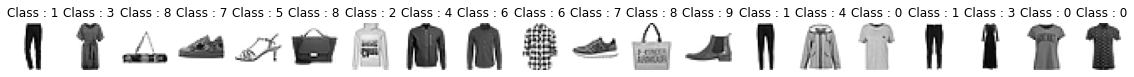

In [6]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [7]:
X_test = Test.values
X_test = X_test.reshape(-1, 28, 28, 1)

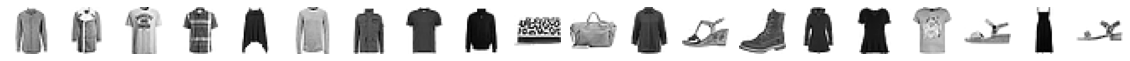

In [8]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

# 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Simple DNN

In [10]:
BATCH_SIZE = 128
EPOCHS = 15

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 8s 4ms/step - loss: 0.5774 - accuracy: 0.7974 - val_loss: 0.4900 - val_accuracy: 0.8300
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4744 - accuracy: 0.8318 - val_loss: 0.4756 - val_accuracy: 0.8374
Epoch 3/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.4547 - accuracy: 0.8392 - val_loss: 0.4705 - val_accuracy: 0.8339
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4456 - accuracy: 0.8439 - val_loss: 0.4384 - val_accuracy: 0.8436
Epoch 5/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.4366 - accuracy: 0.8461 - val_loss: 0.4486 - val_accuracy: 0.8439
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4299 - accuracy: 0.8482 - val_loss: 0.4395 - val_accuracy: 0.8451
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4249 - accuracy: 0.8503 - val_loss: 0.4342 - val_accuracy:

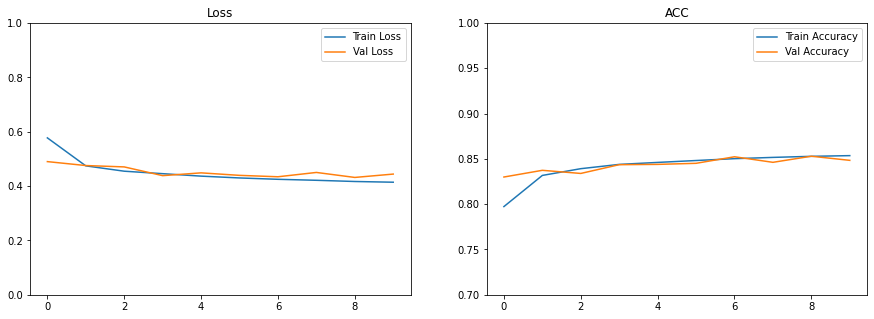

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Activation Function

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.6342 - accuracy: 0.7816 - val_loss: 0.4838 - val_accuracy: 0.8296
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4416 - accuracy: 0.8435 - val_loss: 0.4054 - val_accuracy: 0.8593
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3941 - accuracy: 0.8581 - val_loss: 0.3822 - val_accuracy: 0.8666
Epoch 4/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3659 - accuracy: 0.8665 - val_loss: 0.3731 - val_accuracy: 0.8650
Epoch 5/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3441 - accuracy: 0.8733 - val_loss: 0.3439 - val_accuracy: 0.8782
Epoch 6/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3266 - accuracy: 0.8797 - val_loss: 0.3302 - val_accuracy: 0.8820
Epoch 7/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3111 - accuracy: 0.8845 - val_loss: 0.3273 - val_accuracy:

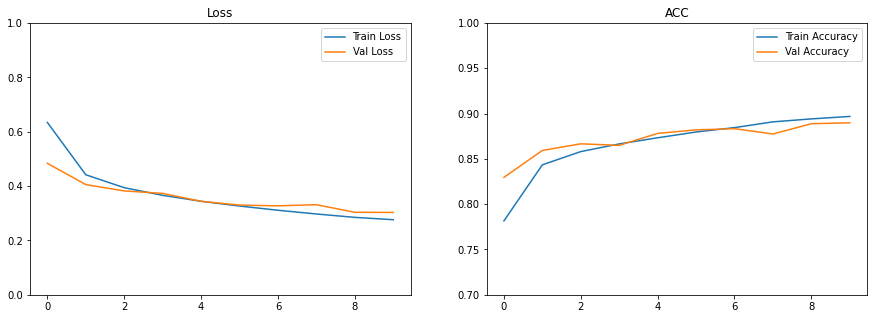

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Weight Initialization

In [28]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.5948 - accuracy: 0.7947 - val_loss: 0.4775 - val_accuracy: 0.8275
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.4288 - accuracy: 0.8466 - val_loss: 0.3919 - val_accuracy: 0.8599
Epoch 3/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3819 - accuracy: 0.8622 - val_loss: 0.3822 - val_accuracy: 0.8612
Epoch 4/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3531 - accuracy: 0.8718 - val_loss: 0.3701 - val_accuracy: 0.8654
Epoch 5/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3309 - accuracy: 0.8792 - val_loss: 0.3700 - val_accuracy: 0.8674
Epoch 6/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3154 - accuracy: 0.8849 - val_loss: 0.3426 - val_accuracy: 0.8739
Epoch 7/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2998 - accuracy: 0.8895 - val_loss: 0.3294 - val_accuracy:

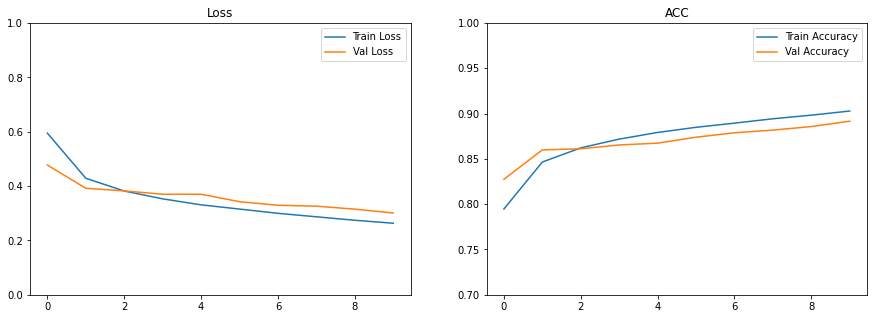

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Batch Normalization

In [32]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)              

In [33]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.5386 - accuracy: 0.8149 - val_loss: 0.3828 - val_accuracy: 0.8608
Epoch 2/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3870 - accuracy: 0.8595 - val_loss: 0.3510 - val_accuracy: 0.8697
Epoch 3/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3371 - accuracy: 0.8789 - val_loss: 0.3397 - val_accuracy: 0.8762
Epoch 4/10
1488/1488 [==============================] - 8s 6ms/step - loss: 0.3058 - accuracy: 0.8886 - val_loss: 0.3117 - val_accuracy: 0.8848
Epoch 5/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.2765 - accuracy: 0.9008 - val_loss: 0.3237 - val_accuracy: 0.8827
Epoch 6/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.2561 - accuracy: 0.9057 - val_loss: 0.3158 - val_accuracy: 0.8838
Epoch 7/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.2368 - accuracy: 0.9131 - val_loss: 0.3147 - val_accuracy

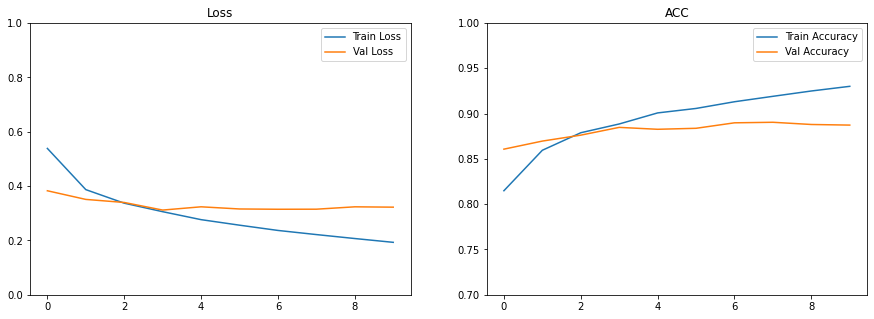

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Optimization

In [36]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)              

In [37]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.5440 - accuracy: 0.8056 - val_loss: 0.4391 - val_accuracy: 0.8383
Epoch 2/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4247 - accuracy: 0.8456 - val_loss: 0.4254 - val_accuracy: 0.8463
Epoch 3/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3785 - accuracy: 0.8622 - val_loss: 0.4439 - val_accuracy: 0.8310
Epoch 4/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3533 - accuracy: 0.8700 - val_loss: 0.3318 - val_accuracy: 0.8771
Epoch 5/10
1488/1488 [==============================] - 8s 6ms/step - loss: 0.3251 - accuracy: 0.8795 - val_loss: 0.3228 - val_accuracy: 0.8797
Epoch 6/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3074 - accuracy: 0.8855 - val_loss: 0.3232 - val_accuracy: 0.8828
Epoch 7/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.2932 - accuracy: 0.8904 - val_loss: 0.3092 - val_accuracy

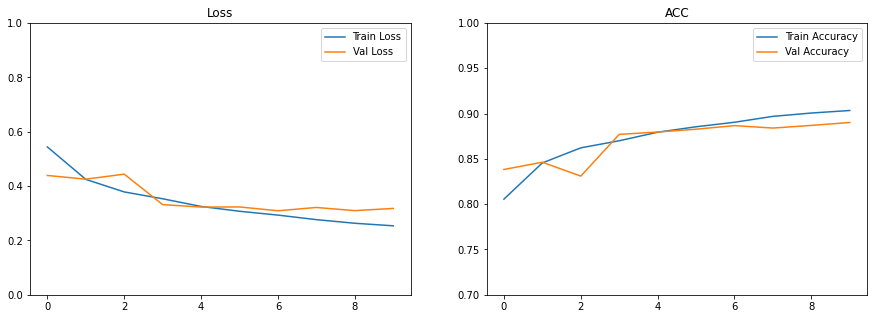

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Dropout

In [40]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)              

In [48]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 6ms/step - loss: 0.4340 - accuracy: 0.8442 - val_loss: 0.3956 - val_accuracy: 0.8522
Epoch 2/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4022 - accuracy: 0.8535 - val_loss: 0.3778 - val_accuracy: 0.8559
Epoch 3/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3838 - accuracy: 0.8612 - val_loss: 0.3288 - val_accuracy: 0.8787
Epoch 4/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3611 - accuracy: 0.8680 - val_loss: 0.3243 - val_accuracy: 0.8806
Epoch 5/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.3488 - accuracy: 0.8730 - val_loss: 0.3011 - val_accuracy: 0.8908
Epoch 6/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.3343 - accuracy: 0.8774 - val_loss: 0.3240 - val_accuracy: 0.8877
Epoch 7/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3213 - accuracy: 0.8829 - val_loss: 0.3745 - val_accura

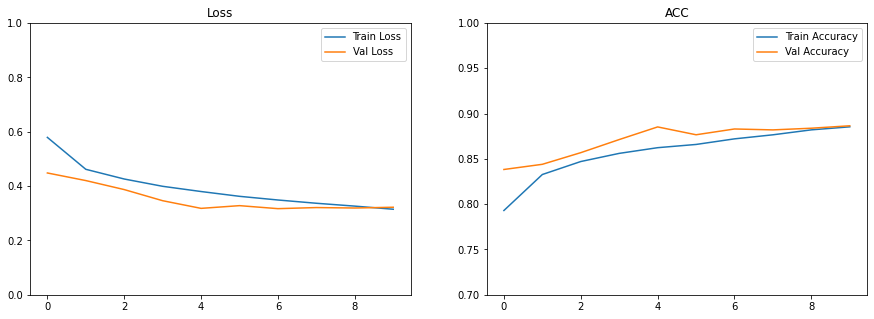

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Regularization

In [44]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)              

In [45]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5679 - accuracy: 0.7957 - val_loss: 0.4873 - val_accuracy: 0.8249
Epoch 2/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4197 - accuracy: 0.8478 - val_loss: 0.3331 - val_accuracy: 0.8785
Epoch 3/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.3718 - accuracy: 0.8639 - val_loss: 0.3426 - val_accuracy: 0.8717
Epoch 4/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3383 - accuracy: 0.8763 - val_loss: 0.3066 - val_accuracy: 0.8863
Epoch 5/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3142 - accuracy: 0.8829 - val_loss: 0.2843 - val_accuracy: 0.8931
Epoch 6/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.2964 - accuracy: 0.8900 - val_loss: 0.2886 - val_accuracy: 0.8925
Epoch 7/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.2779 - accuracy: 0.8974 - val_loss: 0.2787 - val_accura

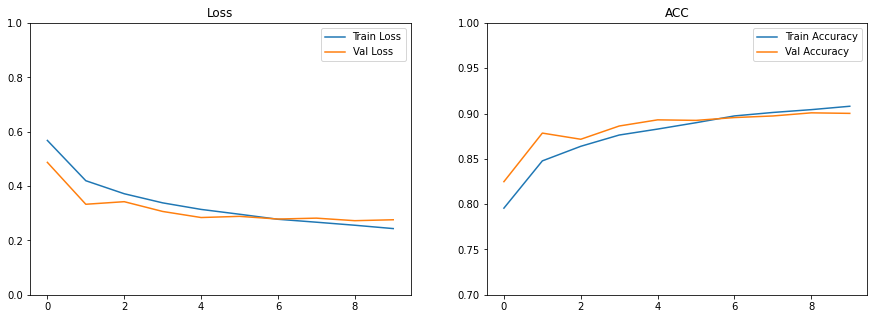

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# 모델 수정해보기

## 활성화 함수 변경
- LeakyReLU
- PReLU
- ELU

In [22]:
# LeakyReLU 활성화함수 사용
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)              

In [23]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
result = model.fit(X_train, y_train, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5930 - accuracy: 0.7879 - val_loss: 0.4258 - val_accuracy: 0.8428
Epoch 2/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4803 - accuracy: 0.8290 - val_loss: 0.4517 - val_accuracy: 0.8443
Epoch 3/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4481 - accuracy: 0.8403 - val_loss: 0.3993 - val_accuracy: 0.8492
Epoch 4/15
1488/1488 [==============================] - 10s 6ms/step - loss: 0.4312 - accuracy: 0.8441 - val_loss: 0.4344 - val_accuracy: 0.8404
Epoch 5/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4102 - accuracy: 0.8502 - val_loss: 0.3835 - val_accuracy: 0.8571
Epoch 6/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3980 - accuracy: 0.8539 - val_loss: 0.3749 - val_accuracy: 0.8637
Epoch 7/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3844 - accuracy: 0.8595 - val_loss: 0.4207 - val_accurac

In [25]:
# PReLU 활성화함수 사용
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 512)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)              

In [26]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
result = model.fit(X_train, y_train, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
1488/1488 [==============================] - 12s 7ms/step - loss: 0.5903 - accuracy: 0.7899 - val_loss: 0.5523 - val_accuracy: 0.7951
Epoch 2/15
1488/1488 [==============================] - 11s 7ms/step - loss: 0.4657 - accuracy: 0.8330 - val_loss: 0.4241 - val_accuracy: 0.8504
Epoch 3/15
1488/1488 [==============================] - 10s 7ms/step - loss: 0.4285 - accuracy: 0.8460 - val_loss: 0.4379 - val_accuracy: 0.8459
Epoch 4/15
1488/1488 [==============================] - 10s 7ms/step - loss: 0.4000 - accuracy: 0.8533 - val_loss: 0.3993 - val_accuracy: 0.8566
Epoch 5/15
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3781 - accuracy: 0.8622 - val_loss: 0.3768 - val_accuracy: 0.8574
Epoch 6/15
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3608 - accuracy: 0.8681 - val_loss: 0.3268 - val_accuracy: 0.8787
Epoch 7/15
1488/1488 [==============================] - 10s 7ms/step - loss: 0.3455 - accuracy: 0.8735 - val_loss: 0.3212 - val_ac

In [19]:
# ELU 활성화함수 사용
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.activations.elu(x, alpha=1.0),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.activations.elu(x, alpha=1.0),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.activations.elu(x, alpha=1.0),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)              

In [20]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
result = model.fit(X_train, y_train, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
1488/1488 [==============================] - 11s 6ms/step - loss: 0.5980 - accuracy: 0.7863 - val_loss: 0.4639 - val_accuracy: 0.8364
Epoch 2/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4727 - accuracy: 0.8297 - val_loss: 0.4593 - val_accuracy: 0.8388
Epoch 3/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4359 - accuracy: 0.8434 - val_loss: 0.5071 - val_accuracy: 0.8134
Epoch 4/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4062 - accuracy: 0.8534 - val_loss: 0.3621 - val_accuracy: 0.8715
Epoch 5/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3878 - accuracy: 0.8613 - val_loss: 0.3742 - val_accuracy: 0.8667
Epoch 6/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3655 - accuracy: 0.8669 - val_loss: 0.3252 - val_accuracy: 0.8791
Epoch 7/15
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3519 - accuracy: 0.8720 - val_loss: 0.4253 - val_accuracy

활성화함수는 ReLU를 그대로 사용하는 것이 좋아보인다

## optimization 방식 변경
- AdaDelta
- Nadam
- Adamax

In [28]:
# Nadam + 한 층 더 추가 (두개 층 추가는 성능 저하됨)
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)              

In [31]:
optimizer = keras.optimizers.Nadam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
result = model.fit(X_train, y_train, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
1488/1488 [==============================] - 20s 12ms/step - loss: 0.2858 - accuracy: 0.8972 - val_loss: 0.2976 - val_accuracy: 0.8913
Epoch 2/15
1488/1488 [==============================] - 17s 12ms/step - loss: 0.2799 - accuracy: 0.8992 - val_loss: 0.3073 - val_accuracy: 0.8903
Epoch 3/15
1488/1488 [==============================] - 17s 11ms/step - loss: 0.2760 - accuracy: 0.8990 - val_loss: 0.2878 - val_accuracy: 0.8990
Epoch 4/15
1488/1488 [==============================] - 17s 11ms/step - loss: 0.2725 - accuracy: 0.8996 - val_loss: 0.2837 - val_accuracy: 0.9019
Epoch 5/15
1488/1488 [==============================] - 17s 12ms/step - loss: 0.2662 - accuracy: 0.9040 - val_loss: 0.2900 - val_accuracy: 0.8955
Epoch 6/15
1488/1488 [==============================] - 17s 11ms/step - loss: 0.2616 - accuracy: 0.9045 - val_loss: 0.2953 - val_accuracy: 0.8968
Epoch 7/15
1488/1488 [==============================] - 17s 11ms/step - loss: 0.2551 - accuracy: 0.9070 - val_loss: 0.3080 -

In [39]:
# Adadelta
optimizer = keras.optimizers.Adadelta(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
result = model.fit(X_train, y_train, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
1488/1488 [==============================] - 15s 9ms/step - loss: 0.5214 - accuracy: 0.8186 - val_loss: 0.3883 - val_accuracy: 0.8639
Epoch 2/15
1488/1488 [==============================] - 13s 9ms/step - loss: 0.5130 - accuracy: 0.8239 - val_loss: 0.3837 - val_accuracy: 0.8640
Epoch 3/15
1488/1488 [==============================] - 13s 9ms/step - loss: 0.5096 - accuracy: 0.8249 - val_loss: 0.3818 - val_accuracy: 0.8651
Epoch 4/15
1488/1488 [==============================] - 13s 9ms/step - loss: 0.5019 - accuracy: 0.8283 - val_loss: 0.3793 - val_accuracy: 0.8665
Epoch 5/15
1488/1488 [==============================] - 13s 9ms/step - loss: 0.5006 - accuracy: 0.8295 - val_loss: 0.3775 - val_accuracy: 0.8669
Epoch 6/15
1488/1488 [==============================] - 13s 9ms/step - loss: 0.5027 - accuracy: 0.8284 - val_loss: 0.3758 - val_accuracy: 0.8677
Epoch 7/15
1488/1488 [==============================] - 13s 9ms/step - loss: 0.4994 - accuracy: 0.8303 - val_loss: 0.3739 - val_ac

In [43]:
# Adamax
optimizer = keras.optimizers.Adamax(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 15s 9ms/step - loss: 0.4686 - accuracy: 0.8408 - val_loss: 0.3530 - val_accuracy: 0.8698
Epoch 2/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.4295 - accuracy: 0.8516 - val_loss: 0.3366 - val_accuracy: 0.8786
Epoch 3/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.4077 - accuracy: 0.8596 - val_loss: 0.3253 - val_accuracy: 0.8800
Epoch 4/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3898 - accuracy: 0.8651 - val_loss: 0.3241 - val_accuracy: 0.8805
Epoch 5/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3742 - accuracy: 0.8700 - val_loss: 0.3070 - val_accuracy: 0.8899
Epoch 6/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3580 - accuracy: 0.8755 - val_loss: 0.3190 - val_accuracy: 0.8844
Epoch 7/10
1488/1488 [==============================] - 13s 9ms/step - loss: 0.3523 - accuracy: 0.8785 - val_loss: 0.3123 - val_ac

결론적으로 활성화함수는 relu를 그대로 사용하는 것이 가장 성능이 좋다고 볼 수 있으며 층을 하나 추가하여 Nadam으로 최적화를 진행하면 성능이 조금 올라가는 것을 확인할 수 있다.

# 제출

In [45]:
BATCH_SIZE = 128
EPOCHS = 100

In [46]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_24 (Batc (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_25 (Batc (None, 256)              

In [47]:
optimizer = keras.optimizers.Nadam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE)

Epoch 1/100
372/372 [==============================] - 7s 13ms/step - loss: 0.5534 - accuracy: 0.8044 - val_loss: 0.4325 - val_accuracy: 0.8413
Epoch 2/100
372/372 [==============================] - 5s 12ms/step - loss: 0.4292 - accuracy: 0.8474 - val_loss: 0.3927 - val_accuracy: 0.8631
Epoch 3/100
372/372 [==============================] - 5s 12ms/step - loss: 0.3903 - accuracy: 0.8605 - val_loss: 0.3786 - val_accuracy: 0.8650
Epoch 4/100
372/372 [==============================] - 4s 12ms/step - loss: 0.3619 - accuracy: 0.8707 - val_loss: 0.3235 - val_accuracy: 0.8812
Epoch 5/100
372/372 [==============================] - 5s 12ms/step - loss: 0.3413 - accuracy: 0.8773 - val_loss: 0.3526 - val_accuracy: 0.8691
Epoch 6/100
372/372 [==============================] - 5s 12ms/step - loss: 0.3296 - accuracy: 0.8799 - val_loss: 0.3838 - val_accuracy: 0.8600
Epoch 7/100
372/372 [==============================] - 5s 12ms/step - loss: 0.3095 - accuracy: 0.8881 - val_loss: 0.3535 - val_accuracy:

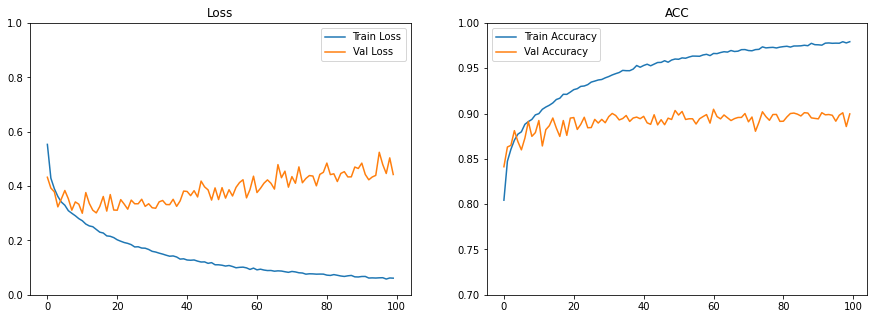

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

In [50]:
pred_label = np.argmax(model.predict(X_test), axis = 1)

submission['label'] = pred_label

submission.to_csv(data_dir + 'BaseLine_Model.csv', index = False)

submission.head()

,id,label
0,0,6
1,1,4
2,2,0
3,3,0
4,4,6
